# Preceptron实验报告

## 导入库文件

In [2]:
import numpy as np                  #   用于处理数组数据
import matplotlib.pyplot as plt     #   用于画图

### 随机生成1000组二维数据及标签

In [3]:
mean1=[-1,0]
cov1=[[1,0],[0,1]]
mean2=[3,4]
cov2=[[1,0],[0,1]]
X1=np.random.multivariate_normal(mean1,cov1,500)
X2=np.random.multivariate_normal(mean2,cov2,500)
X = np.row_stack((X1,X2))
y = np.ones(1000)
y[500:] = 0

### 定义激活函数

In [4]:
def sgn(X, w, b):
    p=X.dot(w)+b
    p[p >=0]=1
    p[p < 0]=0
    return p

### 随机生成权重及偏置


In [5]:
m,n=X.shape
w = np.random.random(n)*X.max(0)
b = np.random.random()*X.max()
print(w, b)

[3.23484053 3.4333186 ] 3.8068633988430896


### 迭代n次并绘制实时图像
**注意：如需绘制实时图像，请不要在jupyter下执行程序，应使用正常python xxx.py执行**

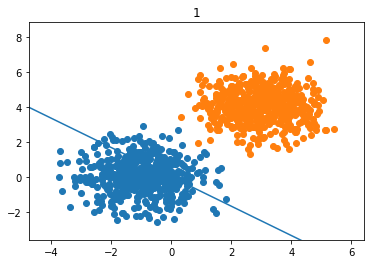

loss: -0.297000
acc:  0.297000


<Figure size 432x288 with 0 Axes>

In [6]:
iters = 0
n = 1  
# 自行更改n值。由于在jupyter中运行时，plt无法自动刷新，
# 而是不断新加显示，达不到动态效果，故此处仅以n=1证明代码work

plt.ion()                                           # 实时刷新
while iters < n:
    iters += 1
    p = sgn(X, w, b)                                # 得到预测值
    w += (y-p).dot(X)                               # 权重更新  
    b += sum(y-p) / len(y)                          # 偏置更新      
    loss = sum(y-p) / len(y)                        # loss计算
    acc = (len(y) - np.count_nonzero(y-p))/len(y)   # 准确度计算
    
    # 绘图参数设置
    plt.xlim(X[:,0].min()-1,X[:,0].max()+1)         
    plt.ylim(X[:,1].min()-1,X[:,1].max()+1)
    plt.title("%s"%str(iters))

    # 绘制数据点
    plt.scatter(X1[:,0],X1[:,1])
    plt.scatter(X2[:,0],X2[:,1])
    
    # 绘制感知机分割线
    x = np.arange(X[:,0].min()-1,X[:,0].max()+1,0.01)
    plt.plot(x, (-w[0]*x-b)/w[1])
    
    # 显示
    plt.show()
    plt.pause(0.001)
    plt.clf()

# 打印最终结果
print("loss: %f" % loss)
print("acc:  %f" % acc) 